In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
def data_preprocessing(data):
    #Prepare the dataset
    data["Close_Next"] = data["Close"].shift(-1)  # Target variable (next minute's price)
    data = data.drop(columns=["Open Time", "Coin"])  # Drop non-numeric columns
    data = data.dropna()  # Remove the last row since it has no target

    # Define features and target
    X = data.drop(columns=["Close_Next"])
    y = data["Close_Next"]
    return X, y

In [4]:
def train_model(X_train, y_train):
    # Train the model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

In [5]:
def evaluate_model(X_test, y_test, model, currency):
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    print(f'MAE of {currency}:' + str(mae))
    print(f"RMSE of {currency}:" + str(rmse))
    return y_pred

In [6]:
def plot_comparison(y_test, y_pred, currency):
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:100], label="Actual", linestyle="-", marker="o", alpha=0.7)  # First 100 points
    plt.plot(y_pred[:100], label="Predicted", linestyle="-", marker="x", alpha=0.7)

    plt.xlabel("Time (minutes)")
    plt.ylabel("Closing Price (USD)")
    plt.title(f"Actual vs. Predicted Closing Prices (First 100 Minutes of Training Dataset) - {currency}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
def next_minute_price(X,y, model,currency):
    # Predict the next minute's closing price
    next_minute_price = model.predict(X.iloc[-1].values.reshape(1, -1))[0]
    if next_minute_price > y.iloc[-1]:
        print(f"{currency}: The price will increase from ${y.iloc[-1]} to ${next_minute_price}")
    elif next_minute_price < y.iloc[-1]:
        print(f"{currency}: The price will decrease from ${y.iloc[-1]} to ${next_minute_price}")

##### 1. Training with Indicators (MACD & RSI)

In [8]:
# Load your dataset
file_path = "processed_data/BTC_1m_data_indicators.csv"  # Update if needed
df = pd.read_csv(file_path)

In [9]:
# Load the datasets
btc_indicators = pd.read_csv("processed_data/BTC_1m_data_indicators.csv")
eth_indicators = pd.read_csv("processed_data/ETH_1m_data_indicators.csv")
xrp_indicators = pd.read_csv("processed_data/XRP_1m_data_indicators.csv")
solana_indicators = pd.read_csv("processed_data/SOL_1m_data_indicators.csv")


In [10]:
X_btc, y_btc = data_preprocessing(btc_indicators)
X_eth, y_eth = data_preprocessing(eth_indicators)
X_xrp, y_xrp = data_preprocessing(xrp_indicators)
X_sol, y_sol = data_preprocessing(solana_indicators)

In [11]:
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(X_btc, y_btc, test_size=0.2, random_state=42, shuffle=False)
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(X_eth, y_eth, test_size=0.2, random_state=42, shuffle=False)
X_train_xrp, X_test_xrp, y_train_xrp, y_test_xrp = train_test_split(X_xrp, y_xrp, test_size=0.2, random_state=42, shuffle=False)
X_train_sol, X_test_sol, y_train_sol, y_test_sol = train_test_split(X_sol, y_sol, test_size=0.2, random_state=42, shuffle=False)

In [12]:
btc_model= train_model(X_train_btc, y_train_btc)
eth_model = train_model(X_train_eth, y_train_eth)
xrp_model = train_model(X_train_xrp, y_train_xrp)
solana_model = train_model(X_train_sol, y_train_sol)

In [13]:
y_pred_btc = evaluate_model(X_test_btc, y_test_btc, btc_model, 'BTC')
y_pred_eth = evaluate_model(X_test_eth, y_test_eth, eth_model, 'ETH')
y_pred_xrp = evaluate_model(X_test_xrp, y_test_xrp, xrp_model, 'XRP')
y_pred_sol = evaluate_model(X_test_sol, y_test_sol, solana_model, 'SOL')

MAE of BTC:85.15194216166597
RMSE of BTC:113955.46010988887
MAE of ETH:2.946465643601176
RMSE of ETH:58.75624953719023
MAE of XRP:0.0027455672123015916
RMSE of XRP:1.4811319857887024e-05
MAE of SOL:4.895772774057637
RMSE of SOL:103.47299692535945


In [14]:
next_minute_price(X_btc, y_btc, btc_model, 'BTC')
next_minute_price(X_eth, y_eth, eth_model, 'ETH')
next_minute_price(X_xrp, y_xrp, xrp_model, 'XRP')
next_minute_price(X_sol, y_sol, solana_model, 'SOL')

BTC: The price will increase from $87246.0 to $90327.71929999998
ETH: The price will increase from $2413.3 to $2425.340299999999
XRP: The price will decrease from $2.2132 to $2.2043909999999984
SOL: The price will increase from $139.27 to $173.02910000000017


/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


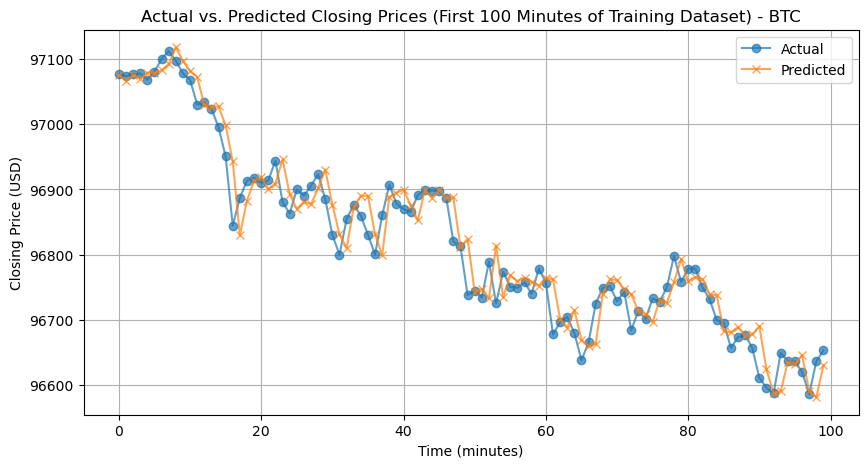

In [15]:
plot_comparison(y_test_btc, y_pred_btc, 'BTC')

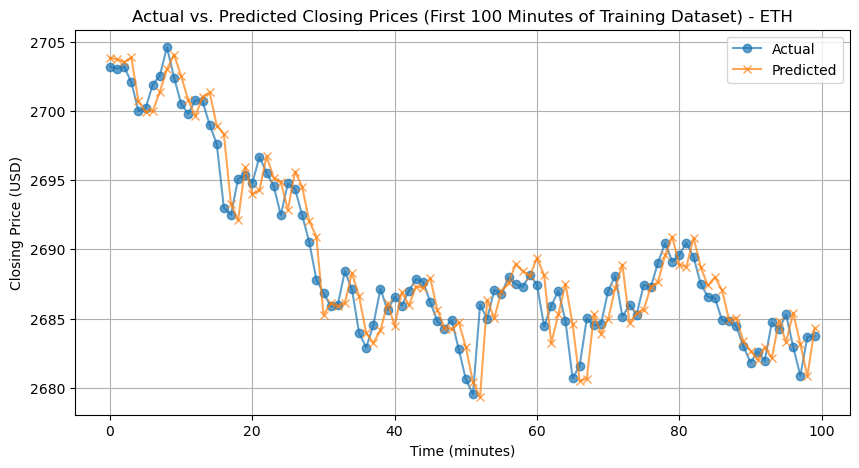

In [16]:
plot_comparison(y_test_eth, y_pred_eth, 'ETH')

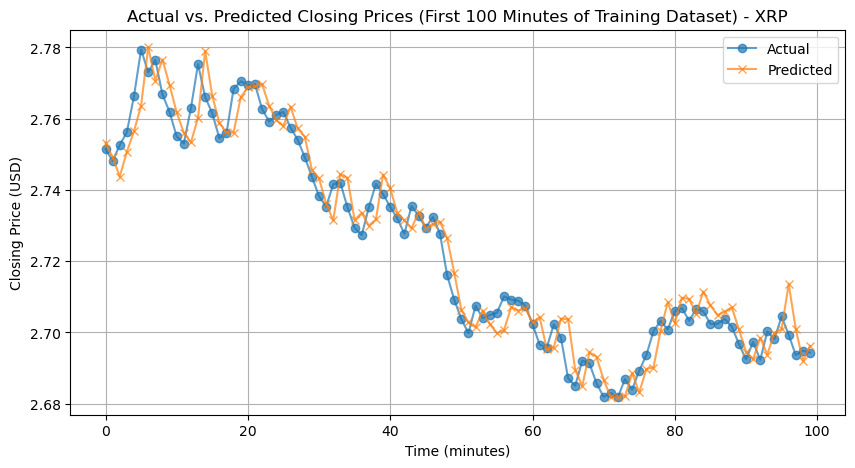

In [17]:
plot_comparison(y_test_xrp, y_pred_xrp, 'XRP')

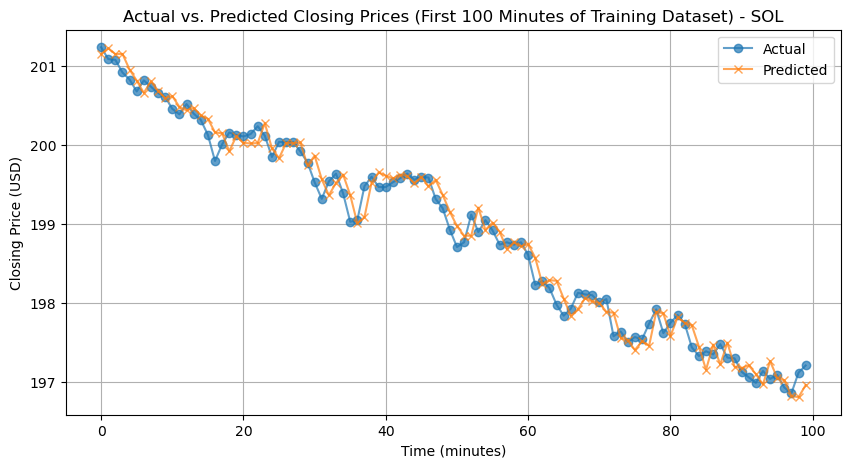

In [18]:
plot_comparison(y_test_sol, y_pred_sol, 'SOL')